<a href="https://colab.research.google.com/github/ozguevara/cbutp/blob/main/learnKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist


In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(60000, 28, 28)

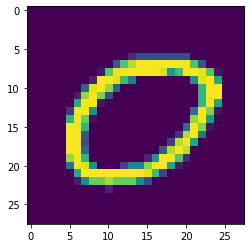

In [ ]:
plt.imshow(train_data[156])

In [ ]:
train_labels[156]

0

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrenando el modelo, primero vamos a modificar algunos datos para que se mas optimo la manera en que se trata la data, cambiando a coma flotante los datos
# Y cambiando tres dimensiones a dos dimensiones
x_train = train_data.reshape((60000, 28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000, 28*28))
x_test = x_test.astype('float32')/255

In [ ]:
# Aqui ya la matriz cambia a decimales, para facilitar el uso de la red neuronal
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
# Aqui comprobamos que al cambiar a categorical me cambia los datos a una matriz, donde pone el 1 (true) en la posicion que representa de manera vectorial
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Entrenando la red, con los datos de prueba, indicandole que haga 5 epocas con paquetes de 128, y vemos que en cada entrenamiento sube el accuracy y baja el loss
# Como una posible desventanja es el desconocimiento real de que pasa adentro de la red neuronal, es como una caja negra y no sabemos que hace con cada dato puntual que le llega

model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 16s 3ms/step - loss: 0.4265 - accuracy: 0.8776
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1142 - accuracy: 0.9663
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0678 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0476 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0344 - accuracy: 0.9898


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0682 - accuracy: 0.9785


[0.06822747737169266, 0.9785000085830688]